https://qiita.com/MorinibuTakeshi/items/f637e22d5cf216d9974b

In [1]:
ls

mastectomy.csv           survival_analysis.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("mastectomy.csv", index_col=0)
data["metastized"] = [1 if k == "yes" else 0 for k in data["metastized"].values]
data.head(30)

,time,event,metastized
1,23,True,0
2,47,True,0
3,69,True,0
4,70,False,0
5,100,False,0
6,101,False,0
7,148,True,0
8,181,True,0
9,198,False,0
10,208,False,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 3 columns):
time          44 non-null int64
event         44 non-null bool
metastized    44 non-null int64
dtypes: bool(1), int64(2)
memory usage: 1.1 KB


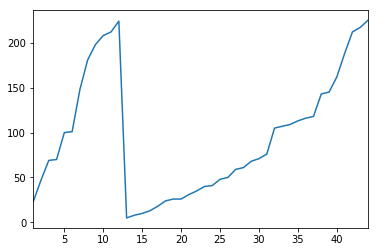

In [5]:
data['time'].plot()

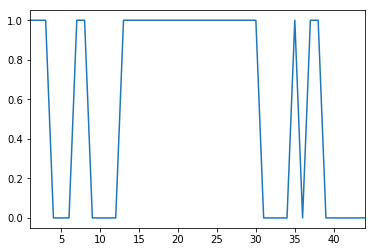

In [6]:
data['event'].astype(int).plot()

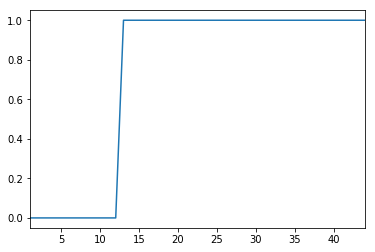

In [7]:
data['metastized'].plot()

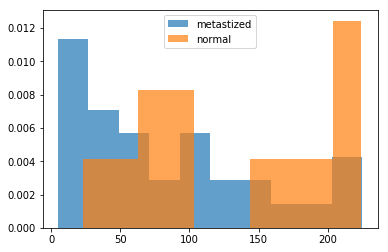

In [8]:
plt.hist(data[data.metastized == 1].time, density=True, alpha=0.7, label="metastized")
plt.hist(data[data.metastized == 0].time, density=True, alpha=0.7, label="normal")
plt.legend()

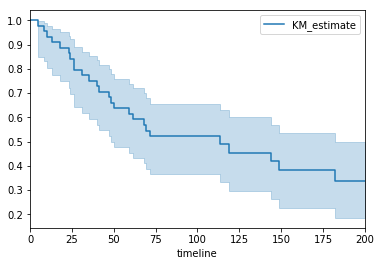

In [9]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data["time"], data["event"], timeline=np.linspace(0,200,200))
kmf.plot()

In [10]:
from lifelines.statistics import logrank_test

data_A = data[data["metastized"] == 1]
data_B = data[data["metastized"] == 0]

results = logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           3.04 0.08      3.62


<lifelines.CoxPHFitter: fitted with 44 observations, 18 censored>
      duration col = 'time'
         event col = 'event'
number of subjects = 44
  number of events = 26
    log-likelihood = -84.56
  time fit was run = 2019-05-11 15:07:34 UTC

---
            coef exp(coef)  se(coef)    z    p  -log2(p)  lower 0.95  upper 0.95
metastized  0.85      2.34      0.50 1.70 0.09      3.47       -0.13        1.84
---
Concordance = 0.59
Log-likelihood ratio test = 3.35 on 1 df, -log2(p)=3.90


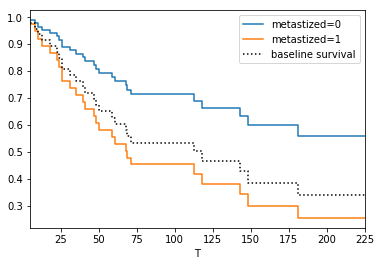

In [11]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col="time", event_col="event")
cph.print_summary()
cph.plot_covariate_groups('metastized', [0, 1])